In [16]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Q1) Read the column description and ensure you understand each attribute well 

In [17]:
#importing the dataset and saving it into a dataframe 
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")

In [18]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [19]:
df.shape

(5000, 14)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [21]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [22]:
for i in df.columns:
  print(i +" Column has "+str(df[i].nunique())+" Unique values")

ID Column has 5000 Unique values
Age Column has 45 Unique values
Experience Column has 47 Unique values
Income Column has 162 Unique values
ZIP Code Column has 467 Unique values
Family Column has 4 Unique values
CCAvg Column has 108 Unique values
Education Column has 3 Unique values
Mortgage Column has 347 Unique values
Personal Loan Column has 2 Unique values
Securities Account Column has 2 Unique values
CD Account Column has 2 Unique values
Online Column has 2 Unique values
CreditCard Column has 2 Unique values


In [23]:
new_df = df.drop(['ID', 'ZIP Code'], axis=1)

In [24]:
new_df.shape

(5000, 12)

In [25]:
new_df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [26]:
#Categorizing the columns into categorical and numerical on the basis of their values
new_df_catcol = new_df[['Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']]
new_df_numcol = new_df[['Age','Experience','Income','Family','CCAvg','Mortgage']]

# Q2) Perform univariate analysis of each and every attribute - use an appropriate plot for a given attribute and mention your insights

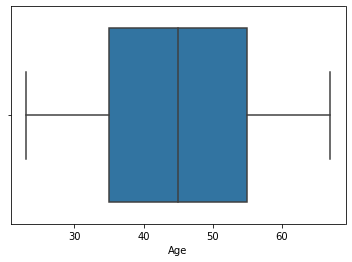

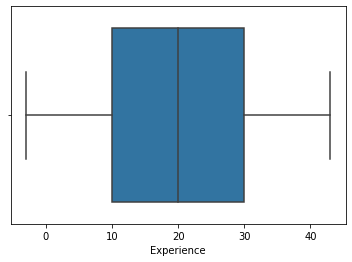

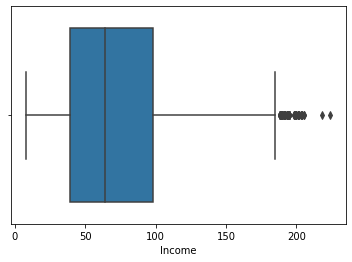

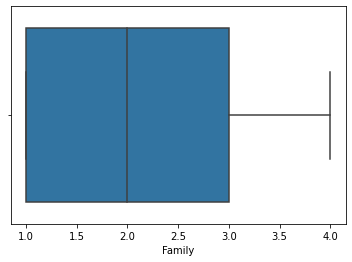

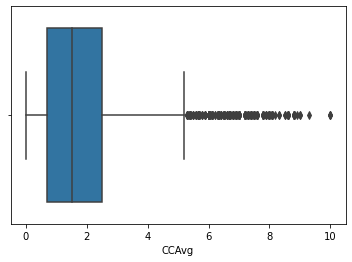

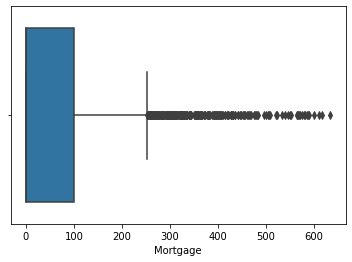

In [27]:
#For numerical columns we can draw box plots which will show its distribution of values 
for i in new_df_numcol.columns:
  sns.boxplot(new_df_numcol[i])
  plt.show()

**From above graphs we can observe that column Age, Experience and family is evenly distributed without any outliers where as columns Income, CCAvg and Mortgage contains many extreme values**

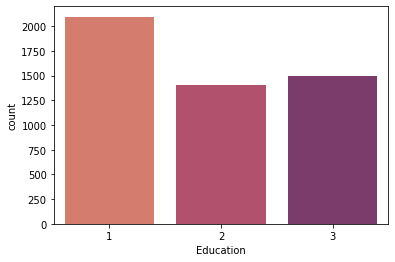

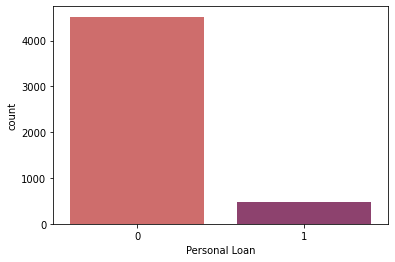

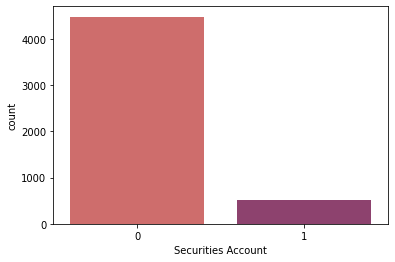

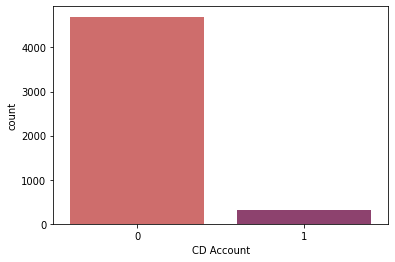

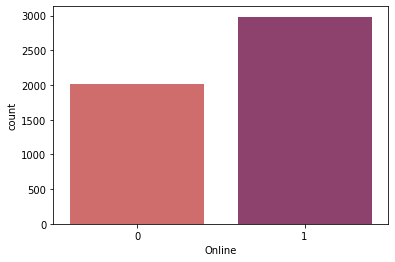

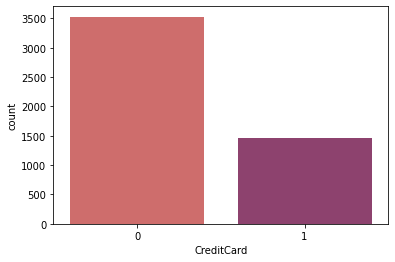

In [34]:
#For categorical columns we can draw countplots which can give us clear insight about the distribution of 
#various categorical values
for i in new_df_catcol.columns:
  sns.countplot(new_df_catcol[i], palette="flare")
  plt.show()

**From above count plots we can conclude that**

* Education level of most of the people is Under graduate and then Graduate and professional
* Very few people accepted the personal loan
* Very few people have security account or CD*
* Most of the people uses online bank facilities*
* Almost 25% of the people uses credit card*

# 3) Perform correlation analysis among all the variables - you can use Pairplot and Correlation coefficients of every attribute with every other attribute

In [35]:
#Changing the datatype of categorical columns from int to object
for i in new_df_catcol.columns:
  new_df_catcol[i] = new_df_catcol[i].astype('object')

In [38]:
# describe the numerical columns
new_df_numcol.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [39]:
# describe the categorical columns
new_df_catcol.describe().T

,count,unique,top,freq
Education,5000,3,1,2096
Personal Loan,5000,2,0,4520
Securities Account,5000,2,0,4478
CD Account,5000,2,0,4698
Online,5000,2,1,2984
CreditCard,5000,2,0,3530


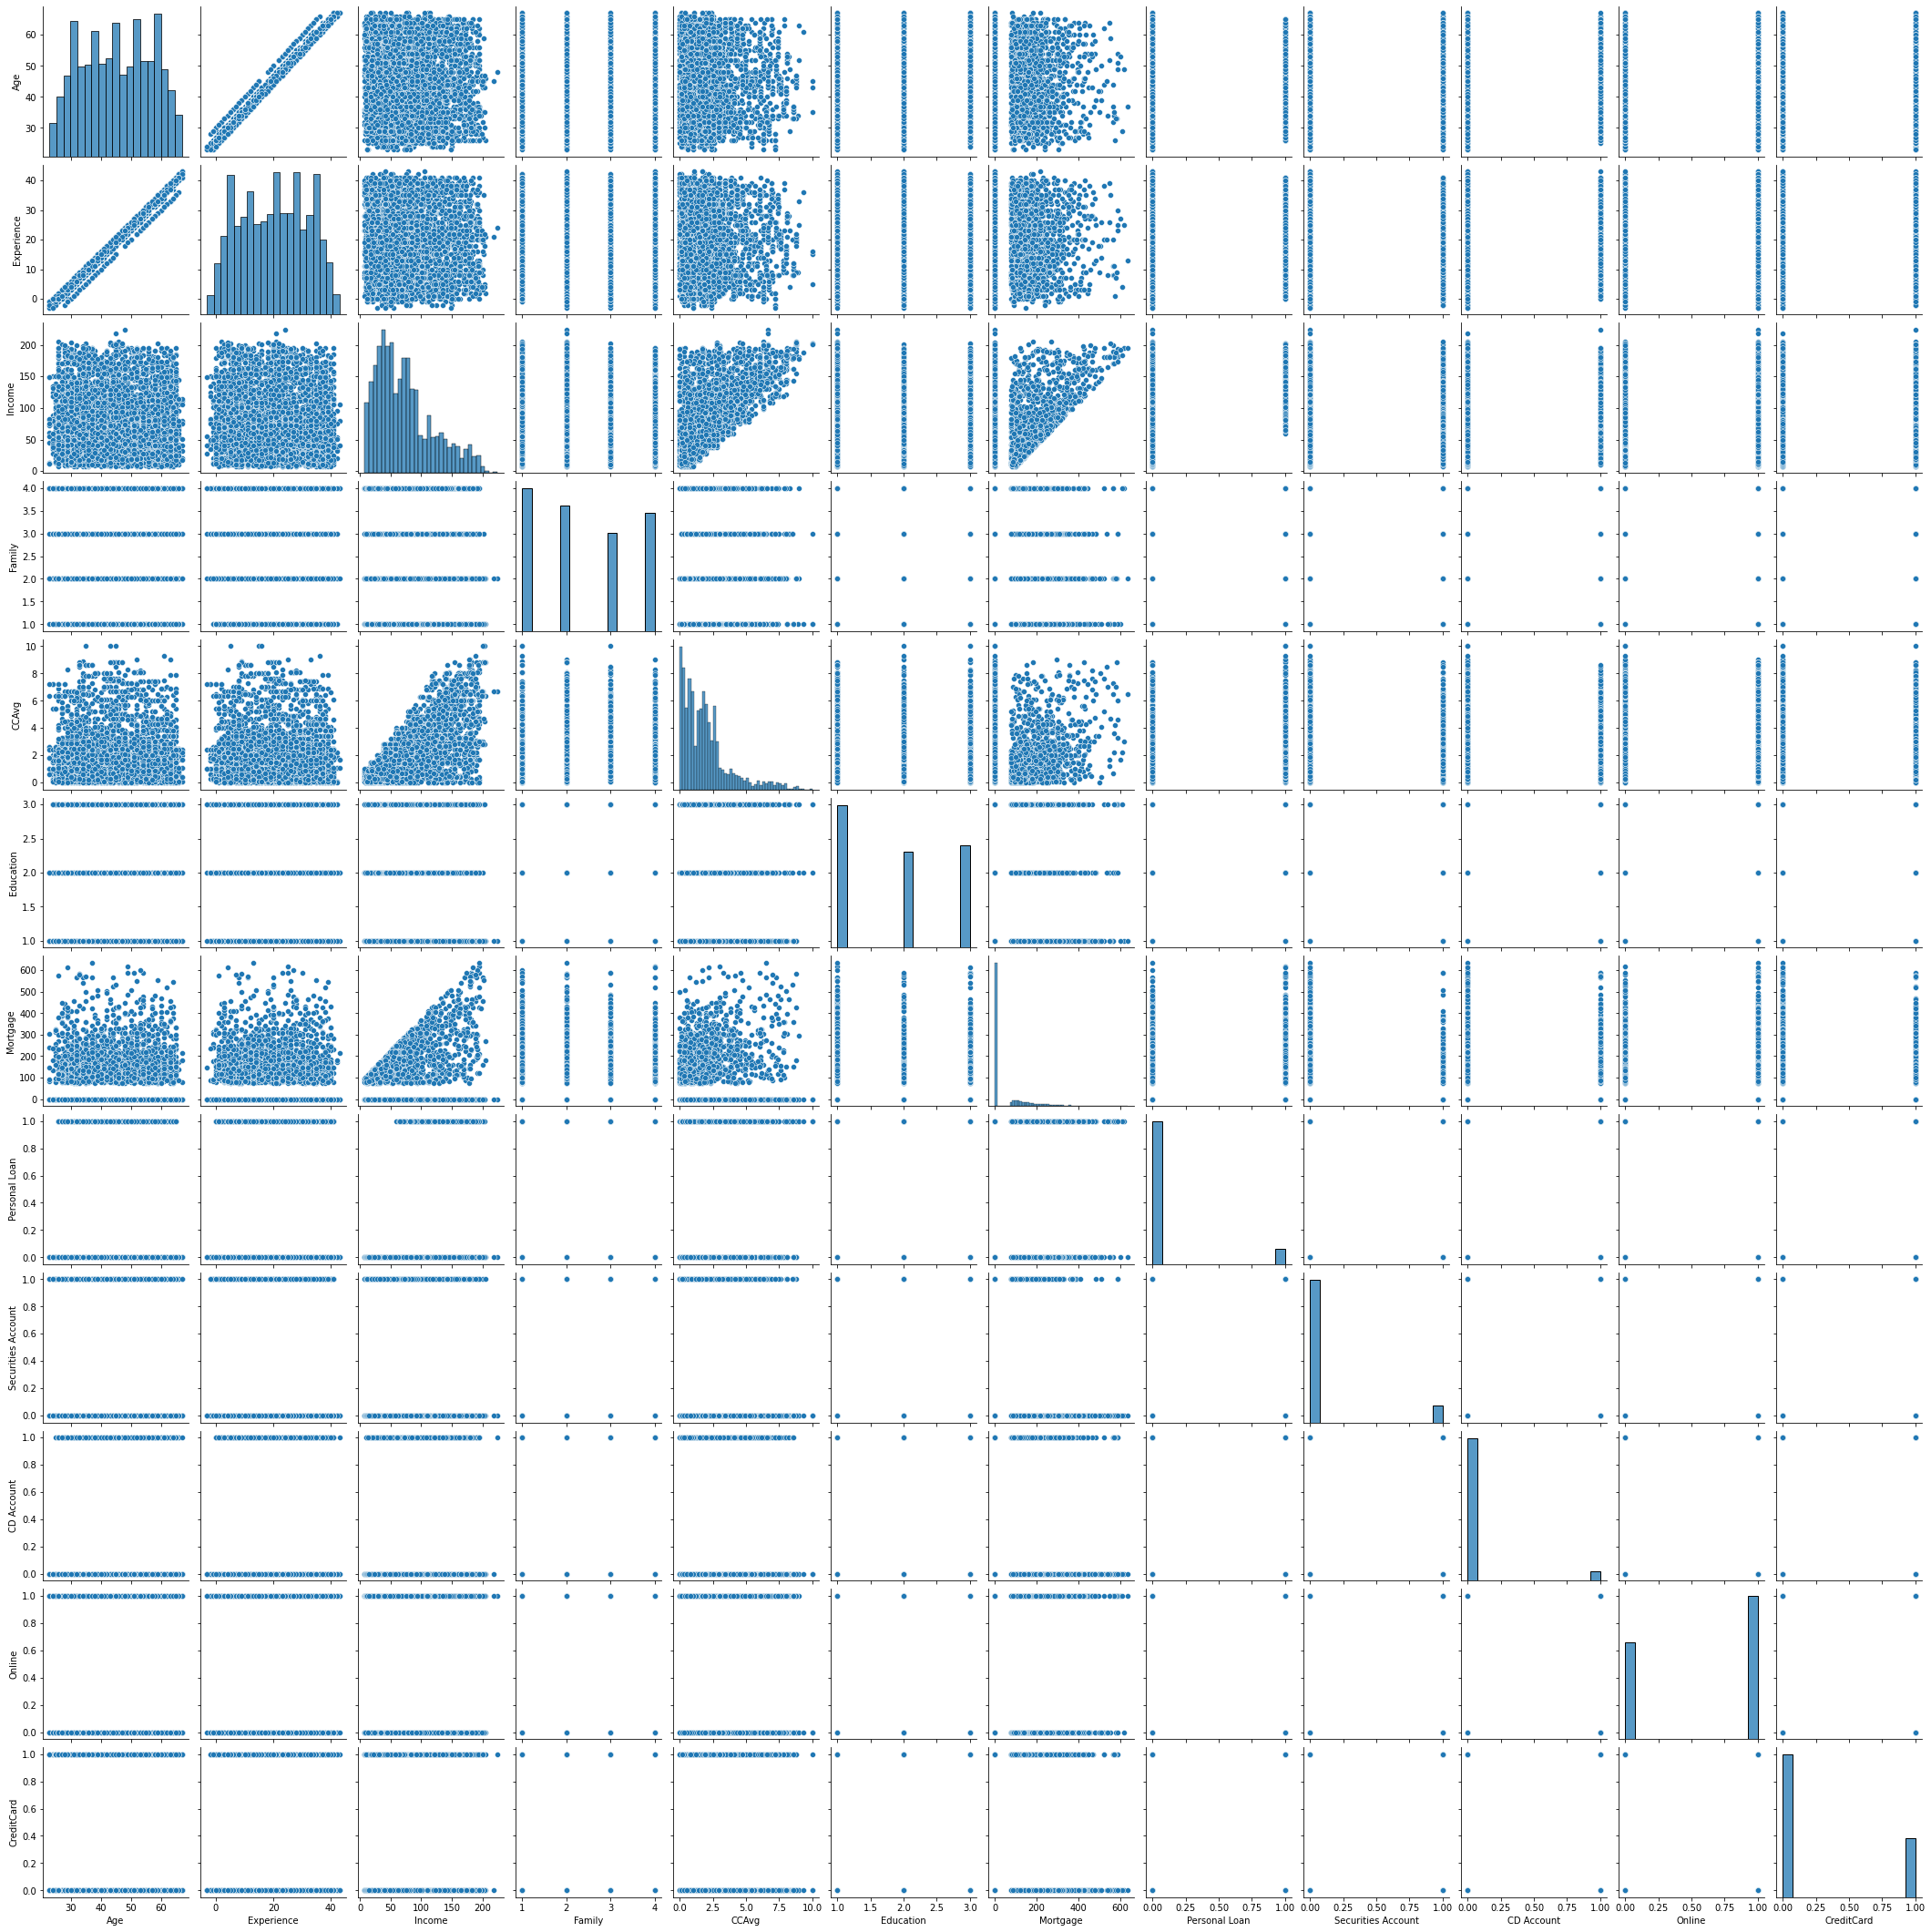

In [40]:
#Drawing pairplot to show the correlation of all the variables
sns.pairplot(new_df)
plt.show()

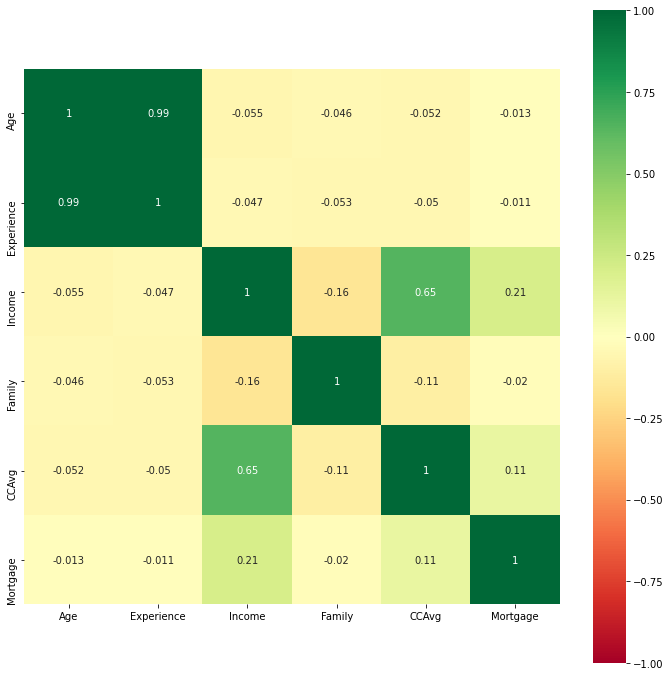

In [43]:
#Plotting the correlation heatmap of all numerical columns
plt.figure(figsize=(12,12))
ax = sns.heatmap(
    new_df_numcol.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap="RdYlGn", annot=True,
    square=True
)
plt.show()

# Q4) One hot encode the Education variable

In [44]:
#One hot encoding the education column using pandas get_dummies function
onehot = pd.get_dummies(new_df_catcol['Education'],prefix='Edu_Level')

In [45]:
#concatenating the onehot columns with orignal dataframe and dropping the education column
new_df = new_df.drop('Education', axis=1)
final_df = pd.concat([new_df, onehot], axis=1)
final_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_Level_1,Edu_Level_2,Edu_Level_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [46]:
final_df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Edu_Level_1             uint8
Edu_Level_2             uint8
Edu_Level_3             uint8
dtype: object

In [47]:
final_df.shape

(5000, 14)

# Q5) Separate the data into dependant and independent variables and create training and test sets out of them(X_train, y_train, X_test, y_test)

In [48]:
#Separating the independent and dependent variables & storing in them two dataframes X and Y respectively.

X = final_df.drop(['Personal Loan'], axis=1)    #Dropping the target column
Y = final_df['Personal Loan'].astype(int)       #Saving the target column in a dataframe

In [64]:
#Splitting the data into training and testing dataset in the ration of 70:30.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Q6) Use StandardScaler( ) from sklearn, to transform the training and test data into scaled values ( fit the StandardScaler object to the train data and transform train and test data using this object, making sure that the test set does not influence the values of the train set)

In [65]:
#Creating an object of StandardScaler
scaler = StandardScaler()

#fit_trandforming the X_train data using the scaler object
X_train = scaler.fit_transform(X_train)

In [66]:
print("Range of X_train value " +str(X_train.min().round(4))+ " to "+ str(X_train.max().round(4)))

Range of X_train value -1.9908 to 5.4069


In [67]:
#transforming the X_test data using scaler object
X_test = scaler.transform(X_test)

In [68]:
print("Range of X_test value " +str(X_test.min().round(4))+ " to "+ str(X_test.max().round(4)))

Range of X_test value -1.9908 to 5.5809


# Q7) Write a function which takes a model, X_train, X_test, y_train and y_test as input and returns the accuracy, recall, precision, specificity, f1_score of the model trained on the train set and evaluated on the test set

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def scores(model, X_train, X_test, y_train, y_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  return accuracy, recall, precision, f1

# Q8) Employ multiple Classification models (Logistic, K-NN, Naïve Bayes etc) and use the function from step 7 to train and get the metrics of the model

In [79]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
lr_accuracy, lr_recall, lr_precision, lr_f1 = scores(LR, X_train, X_test, y_train, y_test)
print(lr_accuracy)
print(lr_recall)
print(lr_precision)
print(lr_f1)

0.96
0.6942675159235668
0.9008264462809917
0.7841726618705036


In [80]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_f1 = scores(KNN, X_train, X_test, y_train, y_test)
print(knn_accuracy)
print(knn_recall)
print(knn_precision)
print(knn_f1)

0.9533333333333334
0.5668789808917197
0.978021978021978
0.717741935483871


In [81]:
from sklearn.svm import SVC
svm_model = SVC()
svm_accuracy, svm_recall, svm_precision, svm_f1 = scores(svm_model, X_train, X_test, y_train, y_test)
print(svm_accuracy)
print(svm_recall)
print(svm_precision)
print(svm_f1)

0.9773333333333334
0.7898089171974523
0.992
0.8794326241134751


In [82]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_f1 = scores(nb_model, X_train, X_test, y_train, y_test)
print(nb_accuracy)
print(nb_recall)
print(nb_precision)
print(nb_f1)

0.8973333333333333
0.5987261146496815
0.5081081081081081
0.5497076023391814


# Q9) Create a dataframe with the columns - “Model”, “accuracy”, “recall”, “precision”, “specificity”, “f1_score”. Populate the dataframe accordingly

In [83]:
pd.DataFrame({'Algorithms':['Logistic Regression','K-NN','SVM','Naïve Bayes'], 
              'Accuracy':[lr_accuracy,knn_accuracy,svm_accuracy,nb_accuracy],
              'Recall':[lr_recall,knn_recall,svm_recall,nb_recall],
              'Precision':[lr_precision,knn_precision,svm_precision,nb_precision],
              'F1_score':[lr_f1,knn_f1,svm_f1,nb_f1]})

,Algorithms,Accuracy,Recall,Precision,F1_score
0,Logistic Regression,0.960000,0.694268,0.900826,0.784173
1,K-NN,0.953333,0.566879,0.978022,0.717742
2,SVM,0.977333,0.789809,0.992000,0.879433
3,Naïve Bayes,0.897333,0.598726,0.508108,0.549708


# Q10) Give your reasoning on which is the best model in this case

**From the above metrices we can conclude that SVM classifier gives the best result with an accuracy score of 97.73% and precision of 99.2%**